In [ ]:
# example of regression modeling using data available online
# based on example from chapter 6 in Deep Learning by Magnus Ekman
# Programming Example: Predicting Housing Prices with a DNN
#
# Process:
#   1. retrieve the dataset to work with (boston housing prices)
#   2. format and set the data up to work with (numpy arrays, reshaped)
#   2b. standardize the training and test data using mean/stdev from training
#   2c. convert into pytorch Dataset objects to work with easily
#   3. create a model - a simple MLP DNN here
#   4. set up a training loop from utils and run
#   4a. put model on GPU, set up dataloaders
#   4b. pick metric, set model to train
#   4c. put data on GPU for batch
#   4d. zero grads, do forward pass
#   4e. get metrics and classification or regression loss
#   4f. backward pass and optimizer step
#   4g. set model to eval and test against test set


In [ ]:
# dataset info from https://lib.stat.cmu.edu/datasets/boston
'''
The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
 '''

In [1]:
# retrieve the Boston housing dataset using sklearn
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from utilities import train_model
import pandas as pd

# set up the device to work on
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# set the training batch and length params
EPOCHS = 500
BATCH_SIZE = 16

# get the data and split it
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

raw_x_train, raw_x_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=0)

# match the data setup to the model (dtype)
raw_x_train = raw_x_train.astype(np.float32)
raw_x_test = raw_x_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

# standardize the data
x_mean = np.mean(raw_x_train, axis=0)
x_stddev = np.std(raw_x_train, axis=0)
x_train = (raw_x_train - x_mean) / x_stddev
x_test = (raw_x_test - x_mean) / x_stddev

# create the dataset objects (using pytorch)
trainset = TensorDataset(torch.from_numpy(x_train),
                         torch.from_numpy(y_train))
testset = TensorDataset(torch.from_numpy(x_test),
                        torch.from_numpy(y_test))


<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
C:\Users\alexb\AppData\Local\Temp\ipykernel_24396\2176527062.py:19: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [3]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [4]:
# Create model.
model = nn.Sequential(
    nn.Linear(13, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

# Initialize weights.
for module in model.modules():
    if isinstance(module, nn.Linear):
        nn.init.xavier_uniform_(module.weight)
        nn.init.constant_(module.bias, 0.0)

# Loss function and optimizer
optimizer = torch.optim.Adam(model.parameters())
loss_function = nn.MSELoss()

# Train model.
train_model(model, device, EPOCHS, BATCH_SIZE, trainset, testset,
            optimizer, loss_function, 'mae')

Epoch 1/500 loss: 554.6846 - mae: 21.0260 - val_loss: 472.3539 - val_mae: 18.2523
Epoch 2/500 loss: 430.8905 - mae: 18.2140 - val_loss: 328.5855 - val_mae: 14.6368
Epoch 3/500 loss: 251.0409 - mae: 13.1105 - val_loss: 140.3293 - val_mae: 8.6555
Epoch 4/500 loss: 79.7378 - mae: 6.9170 - val_loss: 61.9559 - val_mae: 5.1386
Epoch 5/500 loss: 33.3084 - mae: 4.2273 - val_loss: 46.5246 - val_mae: 4.4683
Epoch 6/500 loss: 23.1221 - mae: 3.4287 - val_loss: 38.4945 - val_mae: 4.1440
Epoch 7/500 loss: 19.5710 - mae: 3.1009 - val_loss: 35.5318 - val_mae: 3.9572
Epoch 8/500 loss: 18.1400 - mae: 2.9645 - val_loss: 32.9480 - val_mae: 3.7820
Epoch 9/500 loss: 16.2738 - mae: 2.8337 - val_loss: 31.0055 - val_mae: 3.6436
Epoch 10/500 loss: 16.0300 - mae: 2.7525 - val_loss: 30.3801 - val_mae: 3.5889
Epoch 11/500 loss: 15.1017 - mae: 2.6793 - val_loss: 29.1062 - val_mae: 3.4945
Epoch 12/500 loss: 13.6696 - mae: 2.5847 - val_loss: 28.2665 - val_mae: 3.4237
Epoch 13/500 loss: 13.5347 - mae: 2.5514 - val_los

[0.5931960871586432, 2.6519819838660106]

In [5]:
# test the predictions
inputs = torch.from_numpy(x_test)
inputs = inputs.to(device)
outputs = model(inputs)
for i in range(0, 4):
    print('Prediction: %4.2f' % outputs.data[i].item(),
         ', true value: %4.2f' % y_test[i].item())

Prediction: 24.15 , true value: 22.60
Prediction: 25.86 , true value: 50.00
Prediction: 23.33 , true value: 23.00
Prediction: 9.76 , true value: 8.30


In [6]:
# plot the model fits
import matplotlib.pyplot as plt

model.eval()

# define dataloaders to iter through data
train_loader = DataLoader(trainset, batch_size=1, shuffle=False)
test_loader = DataLoader(testset, batch_size=1, shuffle=False)

In [8]:
# set up a function to plot model actual vs predicted
def plot_actual_vs_predicted(data_loader, dataset_type="Test"):
    actuals = []
    predictions = []

    # Loop through data points
    with torch.no_grad():  # Disable gradient calculation
        for data, target in data_loader:
            # Forward pass through the model
            output = model(data)
            
            # Store actual and predicted values
            actuals.append(target.item())
            predictions.append(output.item())

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(actuals, label='Actual Values', marker='o')
    plt.plot(predictions, label='Predicted Values', marker='x')
    plt.title(f'{dataset_type} Set: Actual vs Predicted Values')
    plt.xlabel('Data Points')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    plt.show()

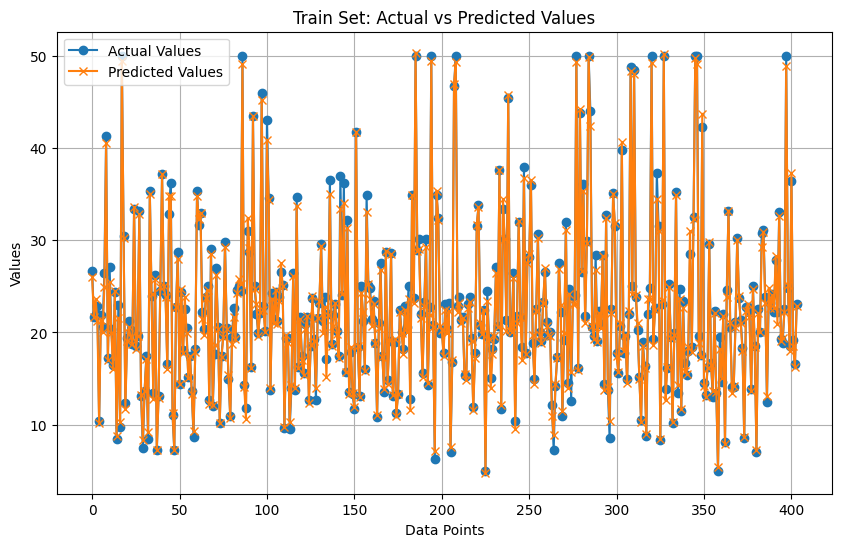

In [9]:
plot_actual_vs_predicted(train_loader, dataset_type="Train")

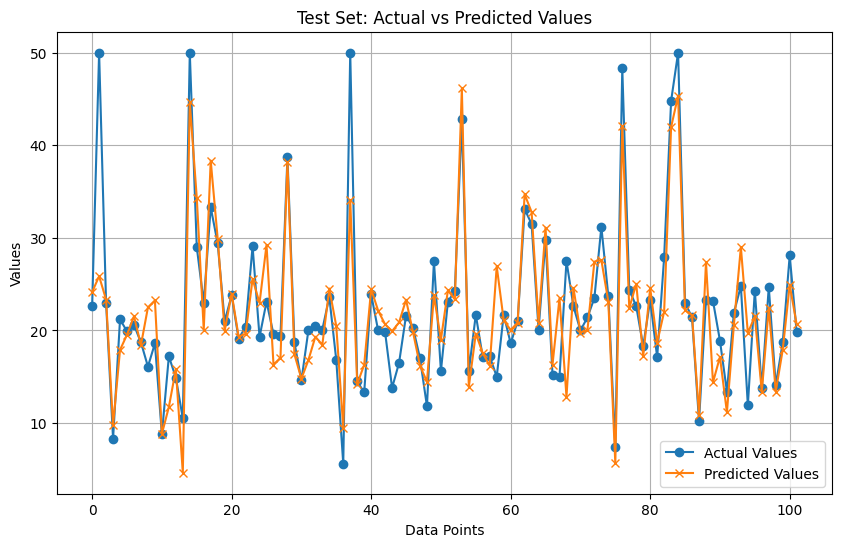

In [10]:
plot_actual_vs_predicted(test_loader, dataset_type="Test")

In [11]:
def plot_true_vs_predicted(data_loader, dataset_type="Test"):
    actuals = []
    predictions = []

    # Loop through data points
    with torch.no_grad():  # Disable gradient calculation
        for data, target in data_loader:
            # Forward pass through the model
            output = model(data)
            
            # Store actual and predicted values
            actuals.append(target.item())
            predictions.append(output.item())

    # Plot true vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(actuals, predictions, label='Data Points', marker='o')
    plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red', label='Perfect Prediction Line')  # Diagonal line
    plt.title(f'{dataset_type} Set: True vs Predicted Values')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.show()



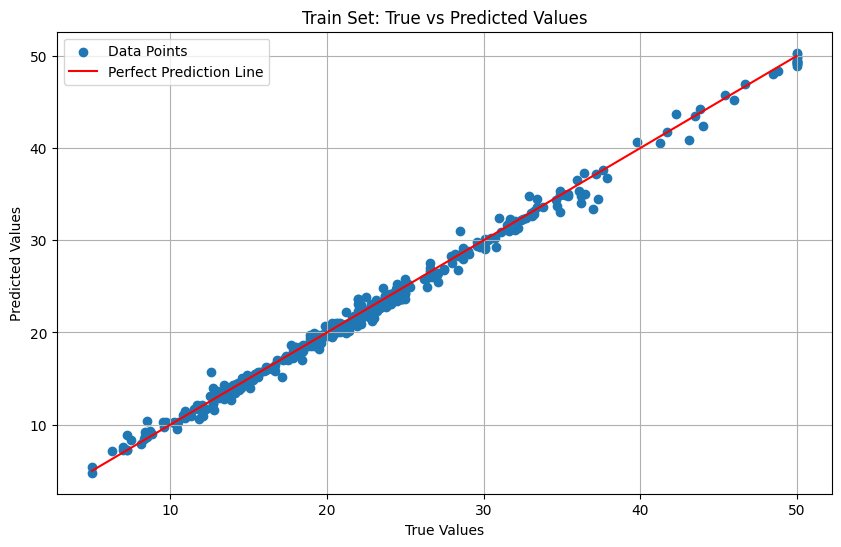

In [12]:
plot_true_vs_predicted(train_loader, dataset_type="Train")

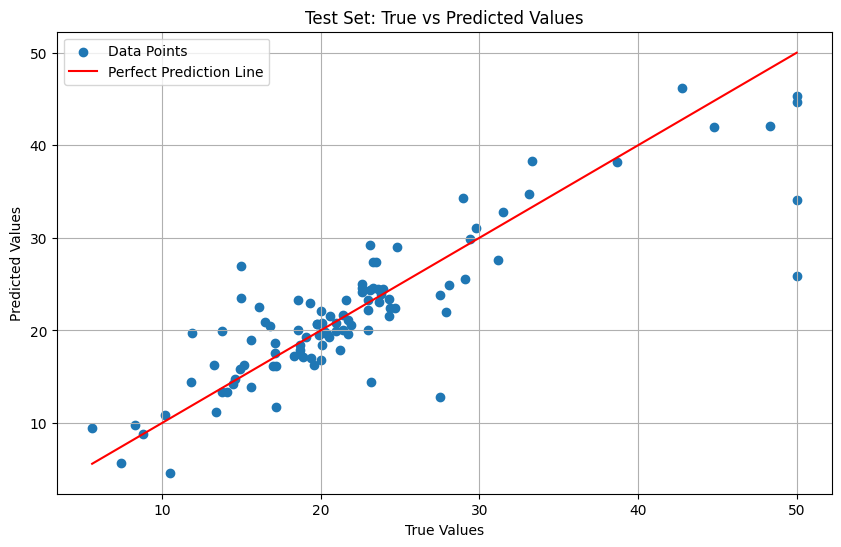

In [13]:
plot_true_vs_predicted(test_loader, dataset_type="Test")

In [14]:
# plot model fitting error (MFE)
def plot_errors(data_loader, dataset_type="Test"):
    actuals = []
    predictions = []
    
    # Loop through data points
    with torch.no_grad():  # Disable gradient calculation
        for data, target in data_loader:
            # Forward pass through the model
            output = model(data)
            
            # Store actual and predicted values
            actuals.append(target.item())
            predictions.append(output.item())

    # Compute fitting error (residuals)
    residuals = [a - p for a, p in zip(actuals, predictions)]

    # Plot residuals (Model Fitting Error)
    plt.figure(figsize=(10, 6))
    plt.scatter(actuals, residuals, label=f'{dataset_type} Residuals', marker='o', color='blue')
    plt.axhline(y=0, color='red', linestyle='--', label='Zero Error Line')  # Line representing no error
    plt.title(f'{dataset_type} Set: Model Fitting Error (Residuals)')
    plt.xlabel('True Values')
    plt.ylabel('Residual (True - Predicted)')
    plt.legend()
    plt.grid(True)
    plt.show()

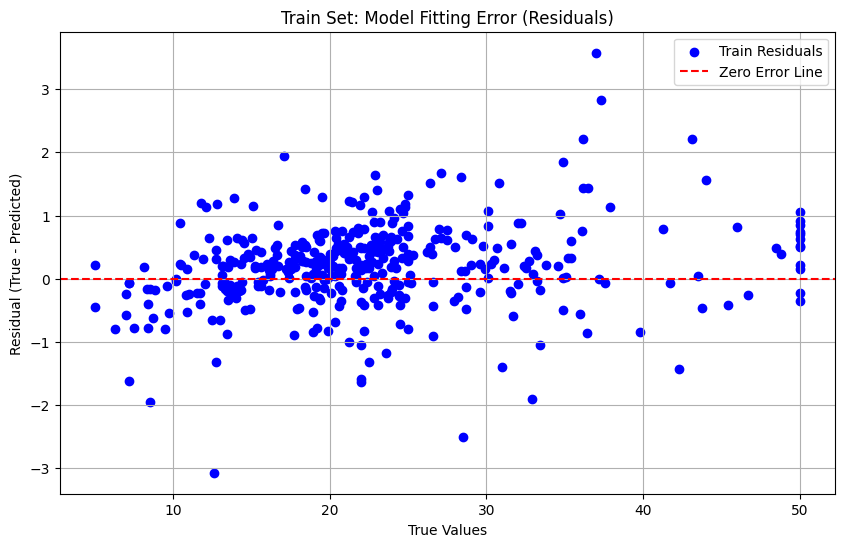

In [15]:
plot_errors(train_loader, dataset_type="Train")

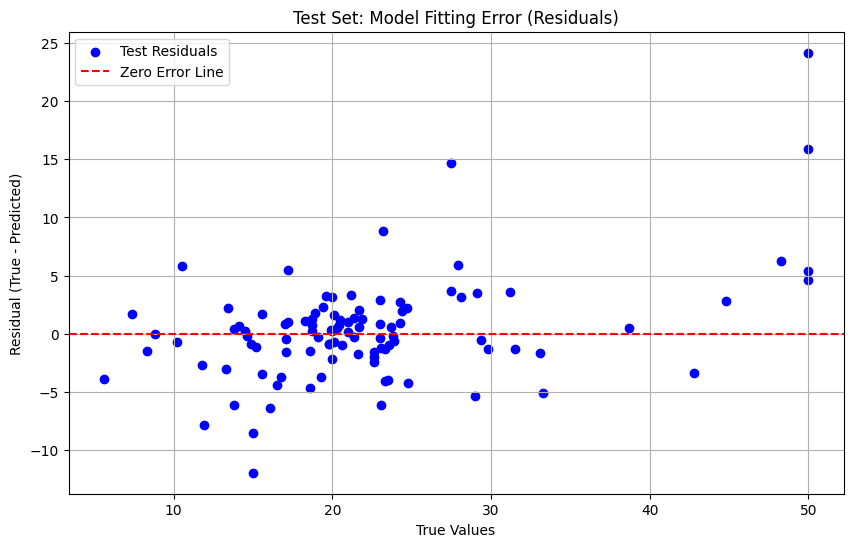

In [16]:
plot_errors(test_loader, dataset_type="Test")

In [17]:
def plot_representation_error():
    train_actuals, train_predictions = [], []
    test_actuals, test_predictions = [], []

    # Collect predictions for training and test sets
    with torch.no_grad():  # Disable gradient calculation
        for data, target in train_loader:
            output = model(data)
            train_actuals.append(target.item())
            train_predictions.append(output.item())
            
        for data, target in test_loader:
            output = model(data)
            test_actuals.append(target.item())
            test_predictions.append(output.item())

    # Plot representation error (generalization error)
    plt.figure(figsize=(10, 6))
    plt.scatter(train_actuals, train_predictions, label='Train Predictions', marker='o', color='green')
    plt.scatter(test_actuals, test_predictions, label='Test Predictions', marker='x', color='orange')
    plt.plot([min(train_actuals + test_actuals), max(train_actuals + test_actuals)], 
             [min(train_actuals + test_actuals), max(train_actuals + test_actuals)], 
             color='red', linestyle='--', label='Perfect Prediction Line')  # Diagonal line
    plt.title('Model Representation Error: Train vs Test')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.show()

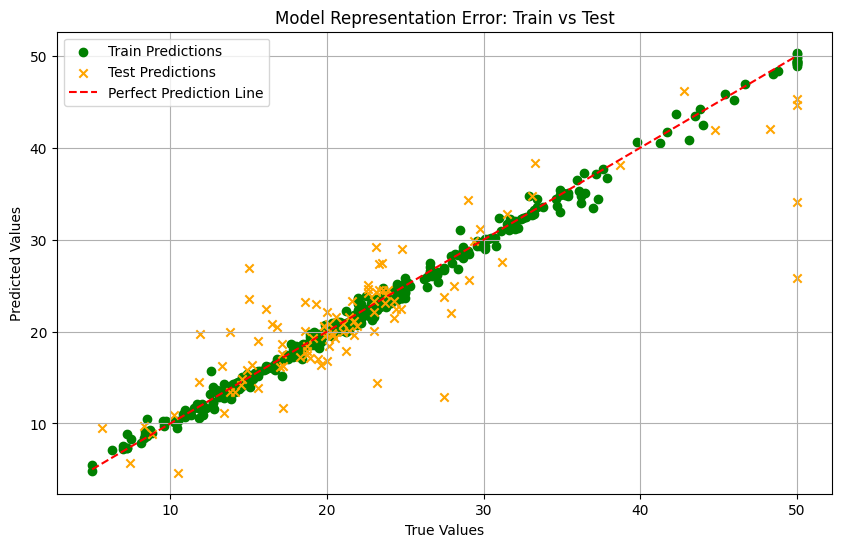

In [18]:
plot_representation_error() 

In [19]:
# distributions of residuals
import seaborn as sns
from scipy.stats import norm

def get_residuals(data_loader):
    actuals = []
    predictions = []
    
    # Loop through data points
    with torch.no_grad():  # Disable gradient calculation
        for data, target in data_loader:
            # Forward pass through the model
            output = model(data)
            
            # Store actual and predicted values
            actuals.append(target.item())
            predictions.append(output.item())
    
    # Compute residuals (actual - predicted)
    residuals = [a - p for a, p in zip(actuals, predictions)]
    return residuals

def plot_residuals_distribution(residuals, dataset_type="Test"):
    # Plot the distribution of the residuals
    plt.figure(figsize=(10, 6))
    
    # Plot histogram and KDE for residuals
    sns.histplot(residuals, kde=True, stat="density", label=f'{dataset_type} Residuals', color='blue', bins=30)
    
    # Plot a standard normal distribution for comparison
    x = np.linspace(min(residuals) - 1, max(residuals) + 1, 100)
    plt.plot(x, norm.pdf(x, 0, 1), label='Standard Gaussian (mean=0, std=1)', color='red', linestyle='--')
    
    plt.title(f'{dataset_type} Set: Residuals Distribution vs Standard Gaussian')
    plt.xlabel('Residuals (True - Predicted)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

In [20]:
# Get residuals for train and test sets
train_residuals = get_residuals(train_loader)
test_residuals = get_residuals(test_loader)

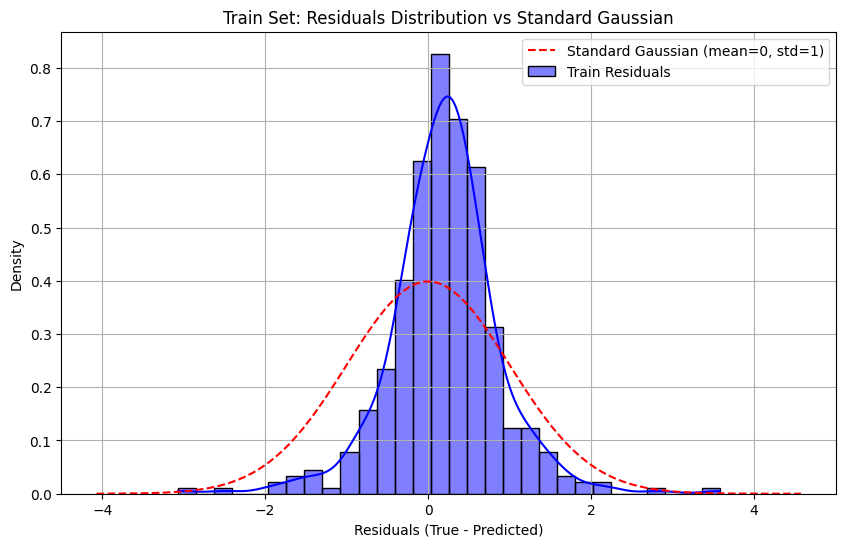

In [21]:
plot_residuals_distribution(train_residuals, dataset_type="Train")

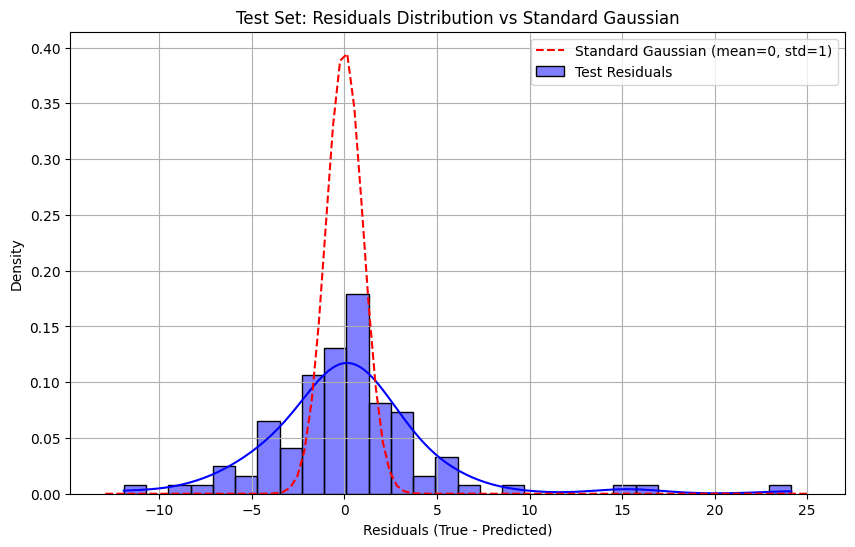

In [22]:
plot_residuals_distribution(test_residuals, dataset_type="Test")